<a href="https://colab.research.google.com/github/YunoGr/google-colab-prototypes/blob/main/notebooks/Nearly_Zero_Energy_Buildings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Energy Efficiency (Heating Load)

**Author**: Pape Malick DIOP

**Task: Predicting energy efficiency (Heating Load) for different building types**

This project aims to predict the heating load, a measure of energy efficiency, for various building types using a provided dataset. The dataset contains several building characteristics that will be used as features for training a machine learning model.

In [115]:
# Data Handling and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Model Saving
import joblib

In [116]:
# Data loading
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)

In [117]:
# Displaying few rows of the DataFrame
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [118]:
# We define the original column names based on the dataset description
original_columns = [
    "Relative Compactness",
    "Surface Area",
    "Wall Area",
    "Roof Area",
    "Overall Height",
    "Orientation",
    "Glazing Area",
    "Glazing Area Distribution",
    "Heating Load",
    "Cooling Load"
]
original_columns

['Relative Compactness',
 'Surface Area',
 'Wall Area',
 'Roof Area',
 'Overall Height',
 'Orientation',
 'Glazing Area',
 'Glazing Area Distribution',
 'Heating Load',
 'Cooling Load']

In [119]:
# Replace the column names
df.columns = original_columns

In [120]:
# Drop the 'Cooling Load' column as it is not the target variable for this task
df = df.drop("Cooling Load", axis=1)

In [121]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [122]:
# Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### Exploratory Data Analysis

This section focuses on exploring the dataset to understand the distribution of features, identify potential outliers, and analyze the relationships between the features and the target variable 'Heating Load'.


In [123]:
# Descriptive statistics
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


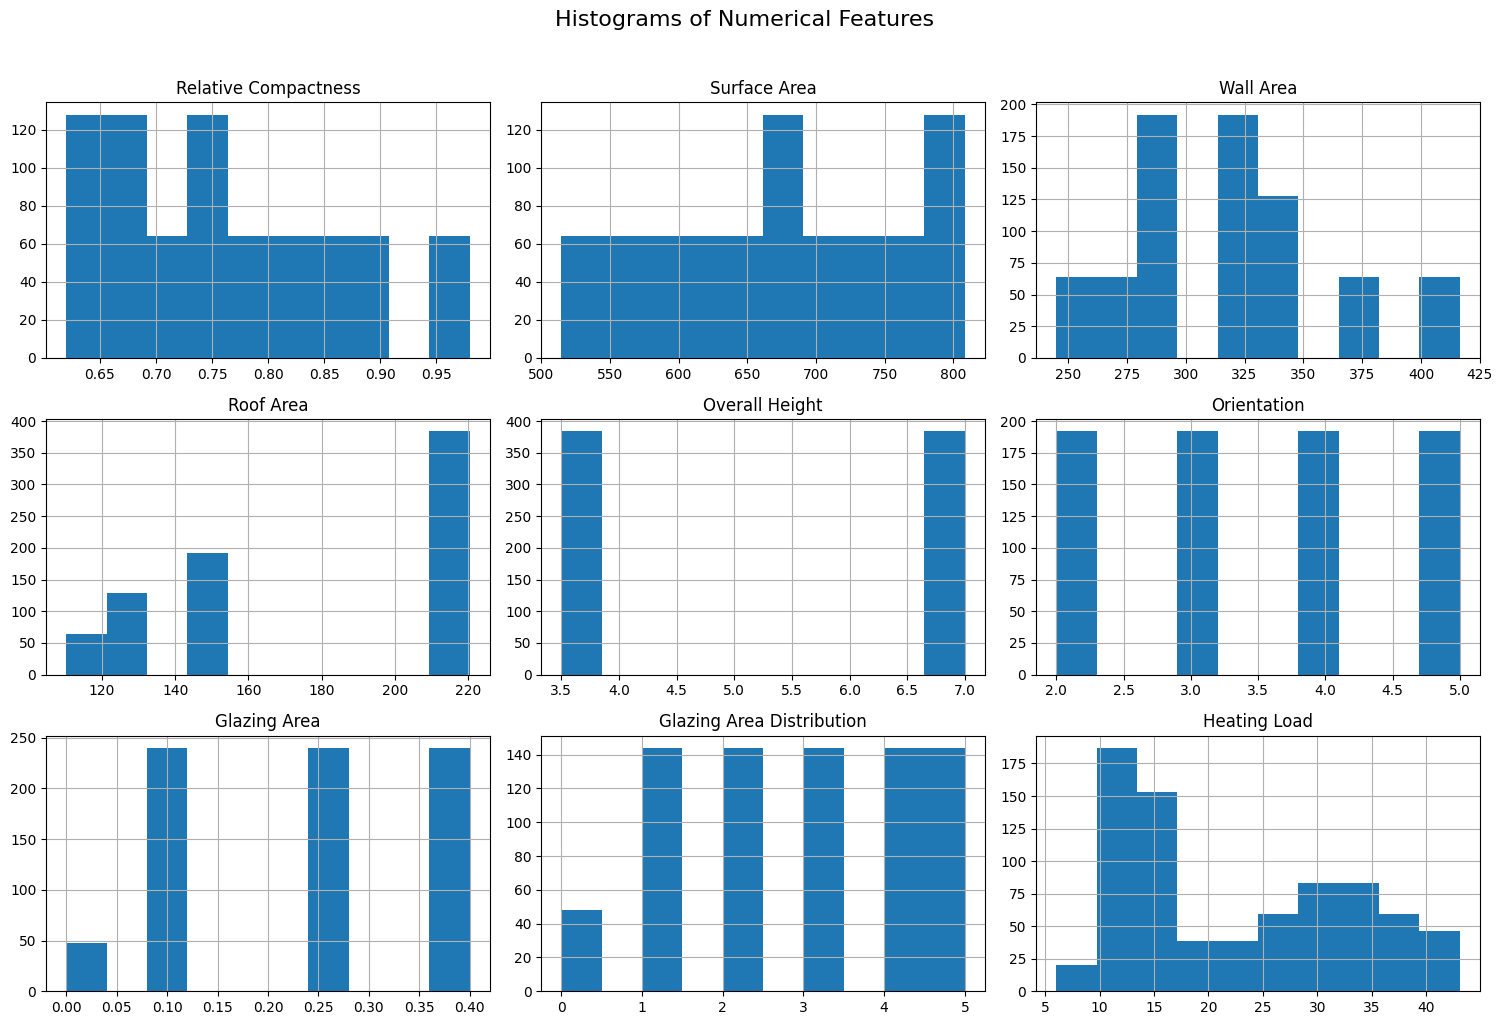

In [124]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Histograms of numerical features
df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

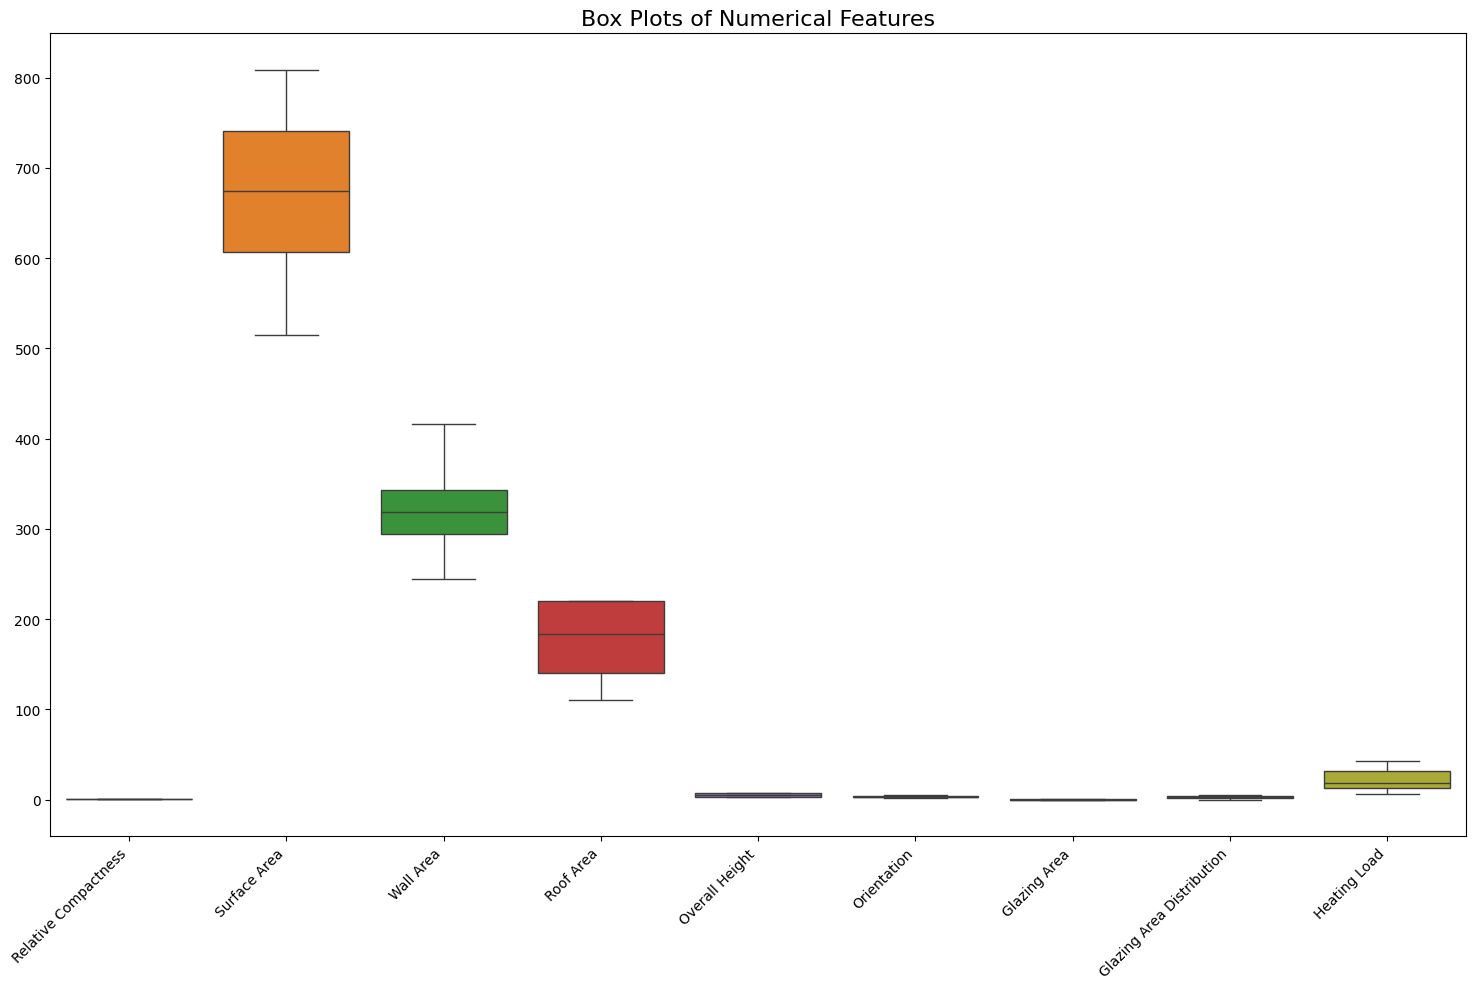

In [125]:
# Box plots of numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plots of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

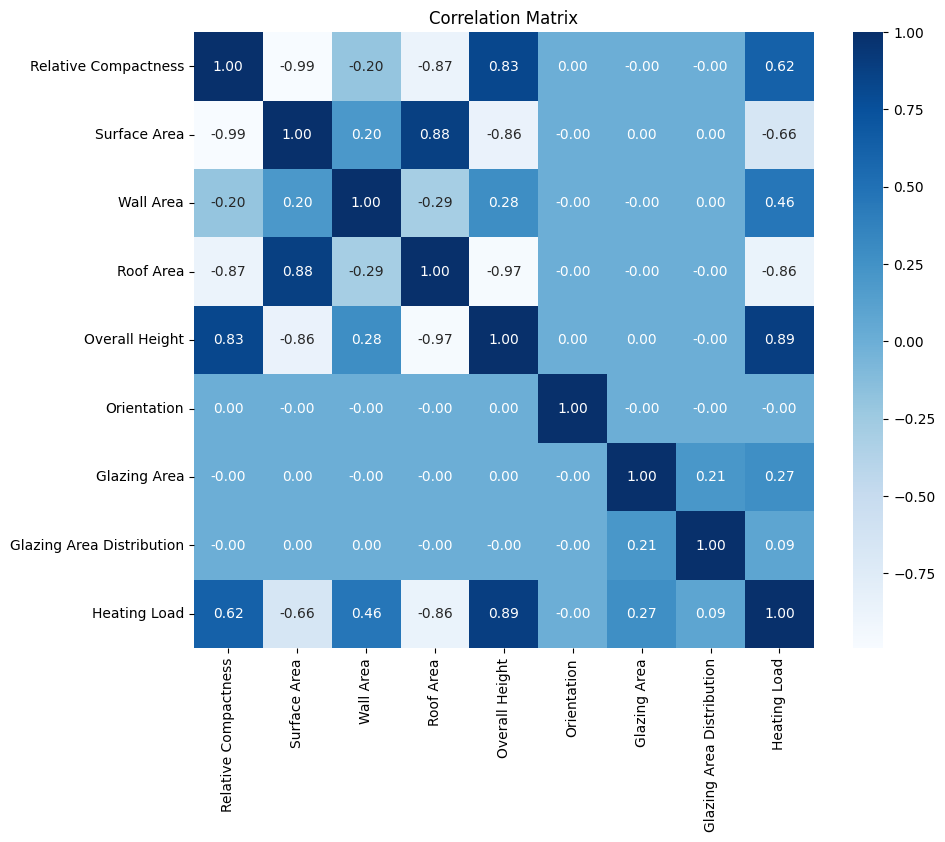

In [126]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [127]:
# Correlations with the target
heating_load_correlation = correlation_matrix['Heating Load'].sort_values(ascending=False)
print(heating_load_correlation)

Heating Load                 1.000000
Overall Height               0.889430
Relative Compactness         0.622272
Wall Area                    0.455671
Glazing Area                 0.269842
Glazing Area Distribution    0.087368
Orientation                 -0.002587
Surface Area                -0.658120
Roof Area                   -0.861828
Name: Heating Load, dtype: float64


Correlation analysis showed that 'Overall Height' has a strong positive correlation with 'Heating Load', while 'Roof Area' has a strong negative correlation, indicating they are important predictors. Other features like 'Relative Compactness' and 'Surface Area' also show notable correlations.

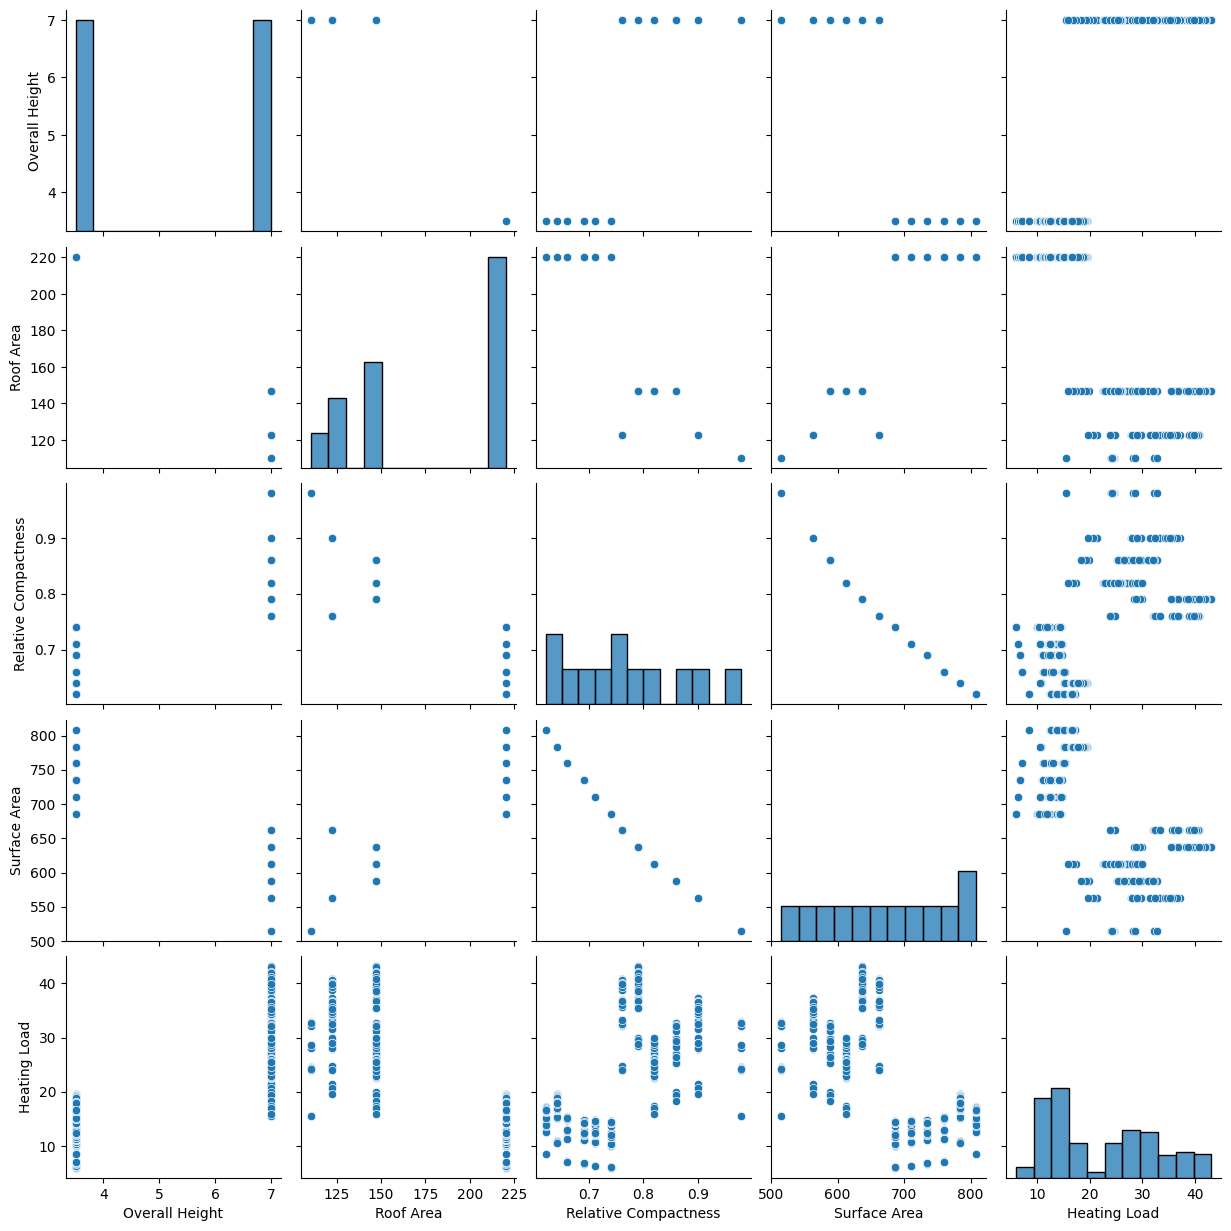

In [128]:
# Selected features and pairwise plots
selected_features = [
    "Overall Height",
    "Roof Area",
    "Relative Compactness",
    "Surface Area",
    "Heating Load"
]
sns.pairplot(df[selected_features])
plt.show()

In [129]:
#
print(df.isnull().sum())

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
dtype: int64


# Model Bulding

### Data preparation

In [130]:
# Features and target
X = df.drop('Heating Load', axis=1)
y = df['Heating Load']

In [131]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

To avoid repeating code for training, prediction, and evaluation for each model, we can create a reusable class or function. This makes the notebook cleaner and more efficient.

In [133]:
class Trainer:
    def __init__(self, model):
        self.model = model

    def train(self, X_train, y_train):
        """Trains the model on the training data."""
        self.model.fit(X_train, y_train)
        print(f"{type(self.model).__name__} trained successfully.")

    def predict(self, X_test):
        """Makes predictions on the test data."""
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        """Evaluates the model on the test data and returns MSE and R-squared."""
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"\n--- {type(self.model).__name__} Evaluation ---")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared Score: {r2:.4f}")
        return mse, r2

In [134]:
trainer = Trainer(model)
trainer.train(X_train, y_train)

LinearRegression trained successfully.


In [135]:
y_pred = trainer.predict(X_test)
mse, r2 = trainer.evaluate(X_test, y_test)


--- LinearRegression Evaluation ---
Mean Squared Error: 9.1532
R-squared Score: 0.9122


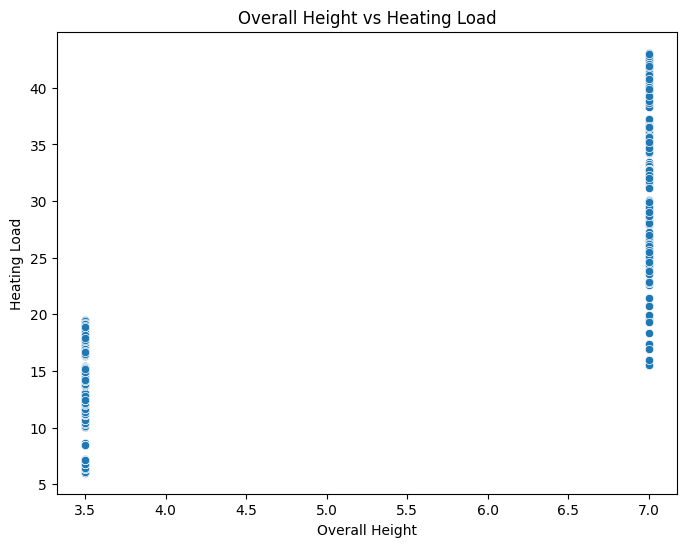

In [136]:
# 'Overall Height' vs 'Heating Load'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Overall Height', y='Heating Load', data=df)
plt.title('Overall Height vs Heating Load')
plt.show()

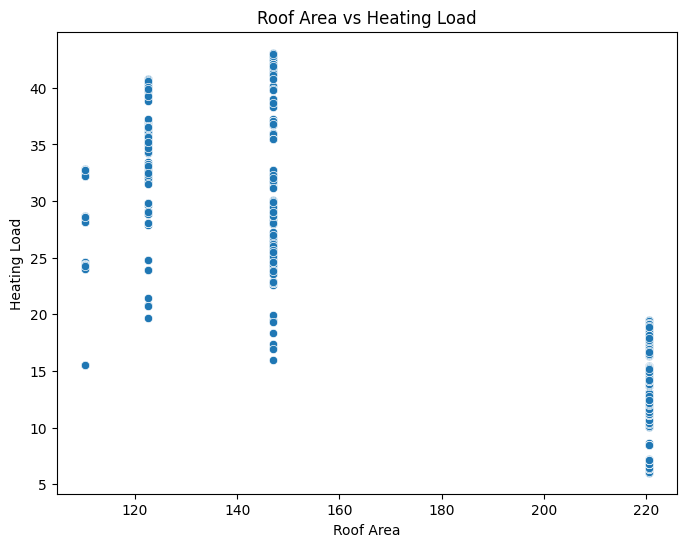

In [137]:
# 'Roof Area' vs 'Heating Load'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Roof Area', y='Heating Load', data=df)
plt.title('Roof Area vs Heating Load')
plt.show()

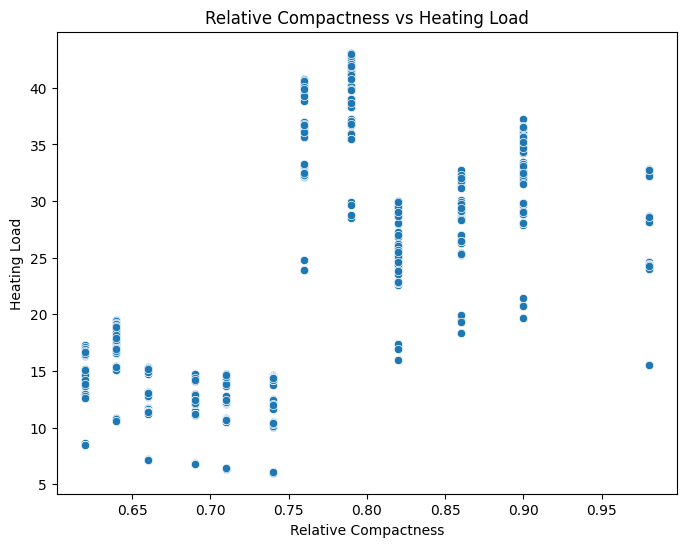

In [138]:
# 'Relative Compactness' vs 'Heating Load'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Relative Compactness', y='Heating Load', data=df)
plt.title('Relative Compactness vs Heating Load')
plt.show()

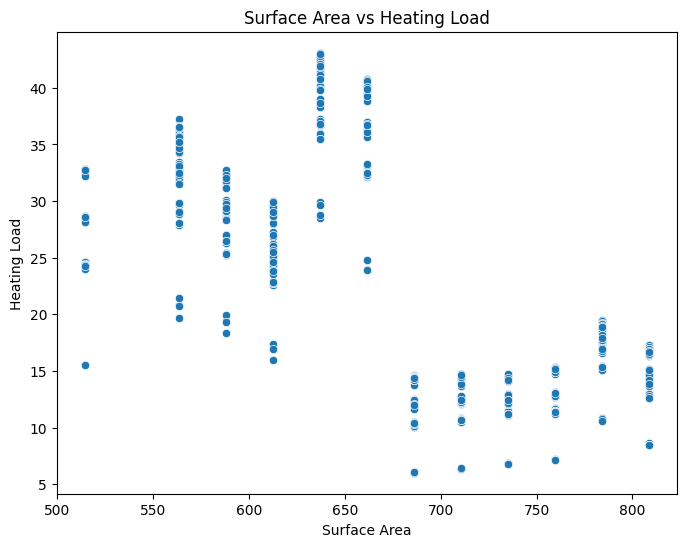

In [139]:
# 'Surface Area' vs 'Heating Load'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Surface Area', y='Heating Load', data=df)
plt.title('Surface Area vs Heating Load')
plt.show()

In [140]:
tree_model = DecisionTreeRegressor(random_state=42)

In [141]:
trainer = Trainer(tree_model)
trainer.train(X_train, y_train)

DecisionTreeRegressor trained successfully.


In [142]:
y_pred_tree = trainer.predict(X_test)
mse_tree, r2_tree = trainer.evaluate(X_test, y_test)


--- DecisionTreeRegressor Evaluation ---
Mean Squared Error: 0.3852
R-squared Score: 0.9963


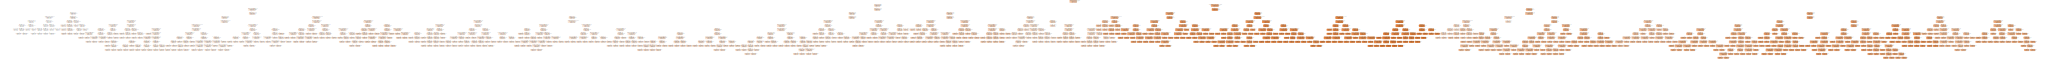

In [143]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Render the graph (this will display the tree)
graph

In [144]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [145]:
trainer = Trainer(rf_model)
trainer.train(X_train, y_train)

RandomForestRegressor trained successfully.


In [146]:
y_pred_rf = trainer.predict(X_test)
mse_rf, r2_rf = trainer.evaluate(X_test, y_test)


--- RandomForestRegressor Evaluation ---
Mean Squared Error: 0.2409
R-squared Score: 0.9977


In [147]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [148]:
trainer = Trainer(gb_model)
trainer.train(X_train, y_train)

GradientBoostingRegressor trained successfully.


In [149]:
y_pred_gb = trainer.predict(X_test)
mse_gb, r2_gb = trainer.evaluate(X_test, y_test)


--- GradientBoostingRegressor Evaluation ---
Mean Squared Error: 0.2653
R-squared Score: 0.9975


In [150]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

feature_importance_series = pd.Series(feature_importances, index=X_train.columns)
# Sort the features by importance
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Feature Importances (Random Forest):")
print(sorted_feature_importances)

Feature Importances (Random Forest):
Relative Compactness         0.394669
Surface Area                 0.192841
Overall Height               0.150991
Roof Area                    0.135369
Glazing Area                 0.079723
Wall Area                    0.033833
Glazing Area Distribution    0.011837
Orientation                  0.000737
dtype: float64


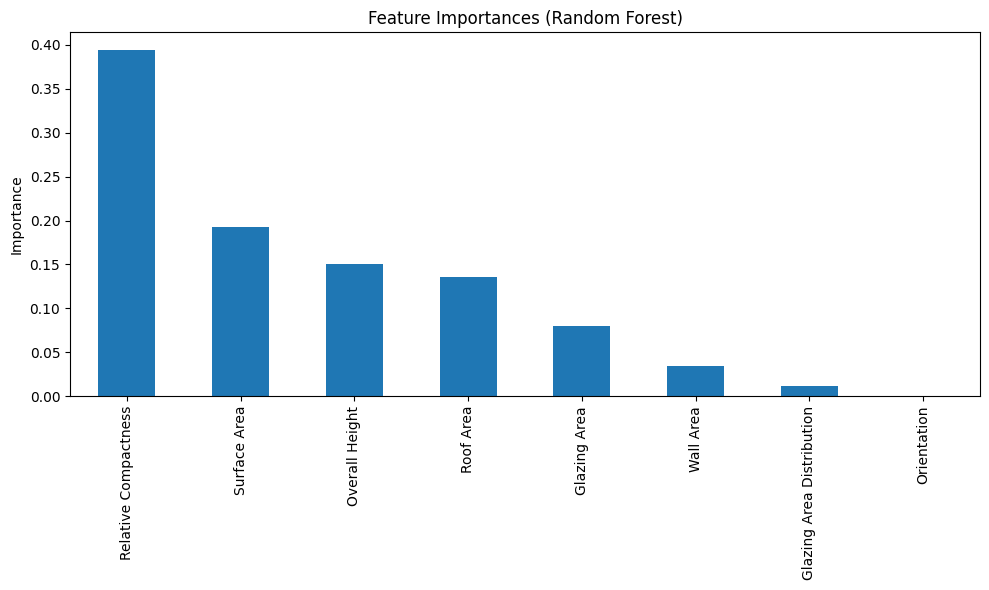

In [151]:
# Visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

Perform hyperparameter tuning for the Random Forest Regressor model using GridSearchCV.

In [152]:
# Define the parameter grid to search
# We'll start with a smaller grid to keep it relatively fast
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

In [153]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Best hyperparameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [154]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [155]:
trainer = Trainer(best_rf_model)
# trainer.train(X_train, y_train)

y_pred_best_rf = trainer.predict(X_test)
mse_best_rf, r2_best_rf = trainer.evaluate(X_test, y_test)


--- RandomForestRegressor Evaluation ---
Mean Squared Error: 0.2398
R-squared Score: 0.9977


In [156]:
cv_mse_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores

# Average MSE and standard deviation across folds
mean_cv_mse = cv_mse_scores.mean()
std_cv_mse = cv_mse_scores.std()

print(f"Cross-validated Mean Squared Error (5-fold): {mean_cv_mse:.4f} (+/- {std_cv_mse:.4f})")

Cross-validated Mean Squared Error (5-fold): 0.2592 (+/- 0.0440)


In [157]:
# Cross-validated R-squared scores
cv_r2_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')

mean_cv_r2 = cv_r2_scores.mean()
std_cv_r2 = cv_r2_scores.std()

print(f"Cross-validated R-squared Score (5-fold): {mean_cv_r2:.4f} (+/- {std_cv_r2:.4f})")

Cross-validated R-squared Score (5-fold): 0.9974 (+/- 0.0006)


### Final Model Evaluation on Test Set


In [158]:
# Predictions on the test set
y_pred_final_test = best_rf_model.predict(X_test)
mse_final_test, r2_final_test = trainer.evaluate(X_test, y_test)


--- RandomForestRegressor Evaluation ---
Mean Squared Error: 0.2398
R-squared Score: 0.9977


### Saving the Final Model

**Reasoning**:
Use joblib to save the trained Random Forest model to a file for future use.

In [159]:
# Filename for the saved model
model_filename = 'best_rf_model.joblib'

# Save the model to the file
joblib.dump(best_rf_model, model_filename)

print(f"Best Random Forest model saved to {model_filename}")

Best Random Forest model saved to best_rf_model.joblib
